In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,date,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,os_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue
0,2019-06-30,351,10,187,2,84,60,4,5174,16,0.0
1,2019-06-30,351,10,187,2,84,58,4,5174,6,0.0
2,2019-06-30,351,10,147,2,84,60,4,5174,4,0.0
3,2019-06-30,351,10,147,2,84,58,4,5174,4,0.0
4,2019-06-30,348,10,147,3,79,59,19,5138,4,0.0


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df['DayOfWeek'] = df['date'].dt.dayofweek
df['WeekOfYear'] =df['date'].dt.weekofyear
df['DayOfMonth'] =df['date'].dt.day

In [6]:
df = df.drop('date',axis=1)
df

,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,os_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,DayOfWeek,WeekOfYear,DayOfMonth
0,351,10,187,2,84,60,4,5174,16,0.0000,6,26,30
1,351,10,187,2,84,58,4,5174,6,0.0000,6,26,30
2,351,10,147,2,84,60,4,5174,4,0.0000,6,26,30
3,351,10,147,2,84,58,4,5174,4,0.0000,6,26,30
4,348,10,147,3,79,59,19,5138,4,0.0000,6,26,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
567286,350,10,187,3,79,59,19,5168,12,0.0254,5,22,1
567287,350,10,187,1,79,56,19,5168,68,0.3400,5,22,1
567288,350,10,158,1,79,56,19,5168,2,0.0046,5,22,1
567289,350,10,33,1,79,56,19,5168,6,0.0120,5,22,1


In [7]:
X = df.drop('total_revenue', axis=1)
y = df['total_revenue']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

In [70]:
y_pred = regressor.predict(X_test)

In [88]:
df1=pd.DataFrame({'S':np.arange(0,len(X_test['DayOfMonth']),1),'Actual':y_test,'Predicted':y_pred})
df1.head(15)
df1.to_csv('Prediction.csv')

,S,Day,Actual,Predicted
161759,0,22,0.0086,1.600000e-03
119857,1,24,0.0000,5.000000e-05
231723,2,19,0.0000,8.666667e-04
136311,3,23,0.0000,2.637079e-09
220208,4,19,0.0000,0.000000e+00
503481,5,4,0.0016,1.600000e-03
69857,6,27,0.0148,1.080000e-02
445750,7,7,0.0086,1.240000e-02
110780,8,24,0.0000,2.637079e-09
353905,9,12,0.0000,0.000000e+00


In [76]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.03690707224009813
Mean Squared Error: 0.14084060713934074
Root Mean Squared Error: 0.3752873660801023


In [89]:
df1['Predicted'] = df1['Predicted'].round(decimals=5) 
df1['Actual'] = df1['Actual'].round(decimals=5) 

In [90]:
df1

,S,Day,Actual,Predicted
161759,0,22,0.0086,0.00160
119857,1,24,0.0000,0.00005
231723,2,19,0.0000,0.00087
136311,3,23,0.0000,0.00000
220208,4,19,0.0000,0.00000
...,...,...,...,...
417543,113454,9,0.0098,0.02180
391684,113455,10,0.0010,0.00052
443177,113456,7,0.0124,0.00920
378178,113457,11,0.0654,0.02000


In [82]:
import matplotlib.pyplot as plt

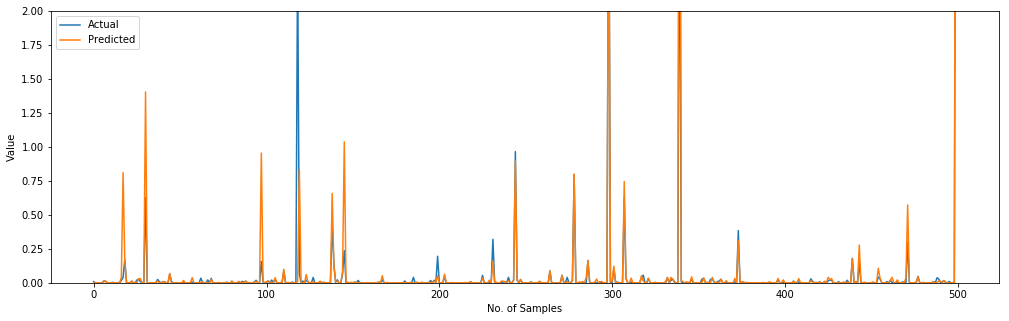

In [110]:
plt.figure(figsize=(17,5))
plt.plot(df1['S'][:500],df1['Actual'][:500],label="Actual")
plt.plot(df1['S'][:500],df1['Predicted'][:500],label="Predicted")
plt.ylim(0,2)
plt.xlabel('No. of Samples')
plt.ylabel('Value')
plt.legend()
plt.savefig('plot.png')

In [111]:
from sklearn import tree